<a href="https://colab.research.google.com/github/bayuzen19/Business-Inteligence-Batch-3/blob/main/Day_16_Bank_Churn_Bayuzen_Ahmad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 2 - Customer Churn Modeling (100 poin)

Anda seorang konsultan data dari salah satu firma konsultan diminta oleh tim bisnis divisi Payment dari sebuah lembaga pinjaman online untuk memprediksi user mana yang tidak akan menggunakan platform mereka lagi untuk melakukan pembayaran online. Mereka sebelumnya pernah meminta konsultan lain untuk membuat modelnya namun konsultan tersebut tidak bisa menjawab mengapa customer diprediksi churn atau tidak berdasarkan model yang dibuat sehingga model tersebut tidak bisa dipakai karena tidak transparan dan tidak bisa memperoleh insight apapun dari model tersebut. <br>

Task <br>
Anda diberikan data dengan beberapa variabel yang diberikan sebagai berikut:
user_id: customer account number. <br>
attrition_flag: customer status (Existing and Attrited).<br>
customer_age: age of the customer.<br>
gender: gender of customer (M for male and F for female).<br>
dependent_count: number of dependents of customers.<br>
education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).<br>
marital_status: customer's marital status (Single, Married, Divorced, and Unknown).<br>
income_category: customer income interval category (Less than $40K, $40K-$60k, $60K-$80K, $80K-$120K, $120K +, and Unknown).<br>
card_category: type of card used (Blue, Silver, Gold, and Platinum).<br>
months_on_book: period of being a customer (in months).<br>
total_relationship_count: the number of products used by customers in the bank.<br>
months_inactive_12_mon: period of inactivity for the last 12 months.<br>
contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months.<br>
credit_limit: credit card transaction nominal limit in one period.<br>
total_revolving_bal: total funds used in one period.<br>
avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.<br>
total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.<br>
total_trans_amt: total nominal transaction in the last 12 months.<br>
total_trans_ct: the number of transactions in the last 12 months.<br>
total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.<br>
avg_utilization_ratio: percentage of credit card usage.<br>

Beberapa yang harus anda lakukan:<br>
Analisa beberapa pertanyaan berikut berdasarkan data yang diberikan (20 poin):<br>
- Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?<br>
- Apakah terdapat korelasi antara tingkat pendidikan dan income category? <br>
- Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?<br>
- Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?<br>
- Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?<br>
- Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?<br>

Buatlah model prediksi dengan menggunakan model machine learning (bebas, tidak dibatasi) dan evaluasi seberapa baik model yang anda buat. Catatan: soal ini akan dinilai berdasarkan apakah mentee sudah menggunakan workflow dengan benar (30 poin)<br>

Anda ingin meyakinkan stakeholder anda bahwa model yang anda gunakan itu akan lebih baik dalam mengidentifikasi customer yang akan churn dibandingkan tanpa menggunakan model. Apa metrik yang dapat anda gunakan untuk membuktikan hal ini? Visualkan! (10 poin)<br>

(Open-Ended) Karena stakeholder anda membutuhkan knowledge dari model, analisislah model yang anda buat dengan menggunakan explanatory model analysis dan buatlah rekomendasi-rekomendasi berdasarkan hasil dari analisis tersebut (40 poin) <br>
Catatan: Gunakan hanya salah satu dari 3 metode ini tergantung jenis modelnya:
Jika model yang dipilih adalah model yang interpretable, gunakan teknik interpretasi sesuai dengan model yang dipilih
Jika model yang dipilih adalah model yang non-interpretable, gunakan metode model agnostics berikut:<br>
Permutation Feature Importance + Partial Dependence Plot
Shapley Additive Value Feature Importance + Shapley Dependence Plot
(40 poin)


In [ ]:
#!pip install feature-engine

In [ ]:
#======Pandas Config========
import pandas as pd
pd.set_option("max_columns",None)

#=======Numpy=========
import numpy as np

#=======Visualization======
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#=======Preprocessing=======
# for Q-Q plots
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency

#=========Modeling ===========
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split as tts
#=====Warnings========
import warnings
warnings.filterwarnings("ignore")


#======Function========
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def create_stacked_bar_percent(df,column_name):
        
    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['attrition_flag'],columns = df[column_name], normalize = 'columns')
    default_by_group = default_by_group[default_by_group.iloc[1].sort_values().index]
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "Not Churn"
    list2_name = "Churn"
    title = f" %Churn by {column_name}"
    xlabel = column_name
    ylabel = "Number of Churn"
    
    fig, ax = plt.subplots(figsize=(8,8),dpi=100)
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold",fontsize=12)
    ax.set_xlabel(xlabel, fontweight = "bold",fontsize=12)
    ax.set_ylabel(ylabel, fontweight = "bold",fontsize=12)
    ax.legend(loc="upper right")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=12)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")

    plt.show()

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

def missing_check(df):
  missing = df.isnull().sum()
  missing_per = round(missing/len(df),4)*100
  unique_val = df.nunique()
  type_data = df.dtypes
  df = pd.DataFrame({'Missing_values':missing,
                    'Percent of Missing (%)':missing_per,
                    'Numbers of Unique':unique_val,
                    'Data type':type_data})
  return df

# Load Dataset

In [ ]:
df = pd.read_csv("https://bit.ly/adv_bi_bank_cust_churn")

# Data Inspection

In [ ]:
#check 5 first row
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#check duplicate
df.duplicated(subset=['user_id']).sum()

0

there is no duplicate data

In [ ]:
#check missing values,data type, dan numbers of unique value
missing_check(df)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
user_id,0,0.0,10127,int64
attrition_flag,0,0.0,2,object
customer_age,0,0.0,45,int64
gender,0,0.0,2,object
dependent_count,0,0.0,6,int64
education_level,0,0.0,7,object
marital_status,0,0.0,4,object
income_category,0,0.0,6,object
card_category,0,0.0,4,object
months_on_book,0,0.0,44,int64


tidak terdapat data yang missing, selanjutnya akan dilakukan analisis

In [ ]:
for x in df.columns:
  print(f"=========={x}===============")
  print(f"{df[x].unique()}")
  print()

==========user_id===============
[768805383 818770008 713982108 ... 716506083 717406983 714337233]

==========attrition_flag===============
['Existing Customer' 'Attrited Customer']

==========customer_age===============
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]

==========gender===============
['M' 'F']

==========dependent_count===============
[3 5 4 2 0 1]

==========education_level===============
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

==========marital_status===============
['Married' 'Single' 'Unknown' 'Divorced']

==========income_category===============
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

==========card_category===============
['Blue' 'Gold' 'Silver' 'Platinum']

==========months_on_book===============
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 

dari hasil investigasi nilai pada tiap kolom, terdapat hal aneh pada income dimana terdapat income yang tidak diketahui dan juga pada education level

# Eksplonatory Data Analysis

In [ ]:
df = df.set_index('user_id')
df["attrition_flag"] = df["attrition_flag"].replace(['Existing Customer', 'Attrited Customer'],[0,1])
df["attrition_flag"].unique()

array([0, 1])

In [ ]:
#spliiting data 80% training and 20% test
X = df.drop('attrition_flag',axis=1).copy()
y = df["attrition_flag"].copy()

X_train,X_test,y_train,y_test = tts(X,y,stratify=y,test_size=0.2,random_state=42)

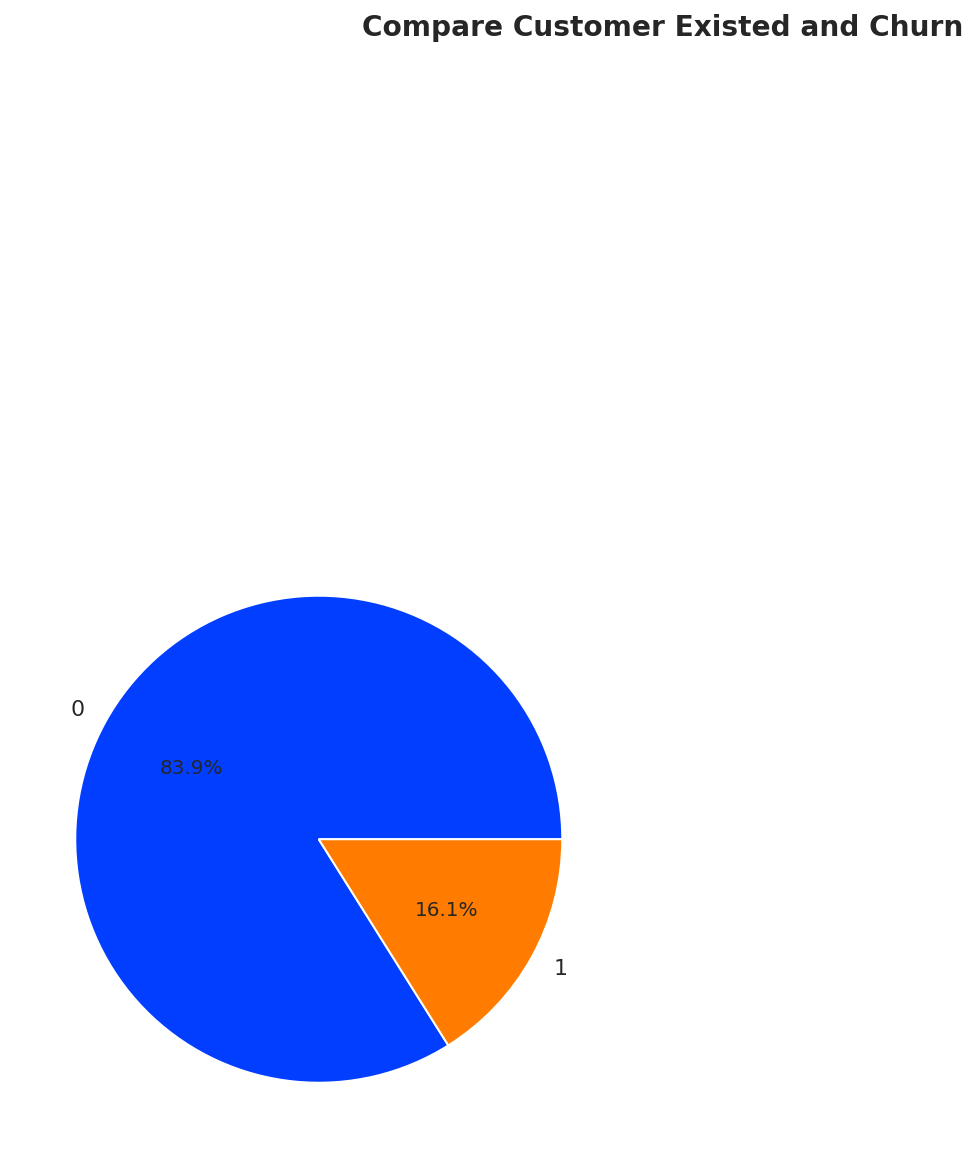

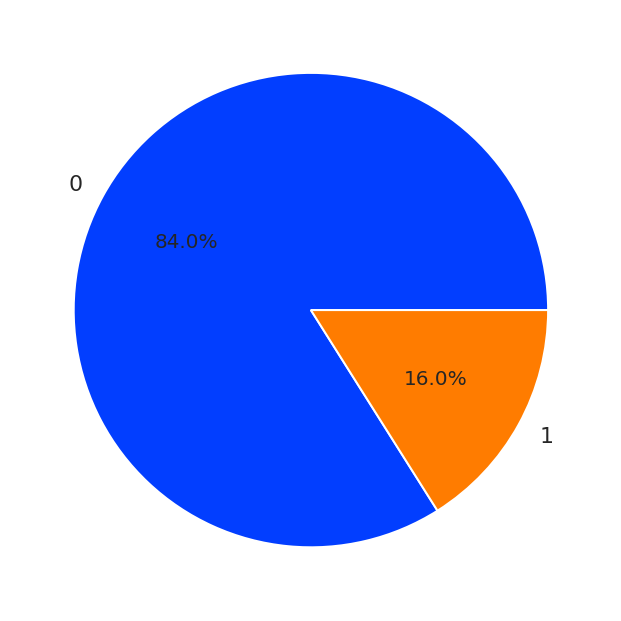

In [ ]:
#baseline data
train_count = pd.Series(y_train).value_counts()
test_count = pd.Series(y_test).value_counts()


plt.figure(figsize=(12,12))
plt.subplot(121)
plt.suptitle('Compare Customer Existed and Churn',fontsize=14,fontweight="bold")
plt.pie(train_count,labels=train_count.index,autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(212)
plt.pie(test_count,labels=test_count.index,autopct='%1.1f%%')
plt.show()

Perbandingan customer yang telah churn dan existed adalah 4:21, perbandingan imbalance dan cukup ekstreme

In [ ]:
X_train["attrition_flag"] = y_train

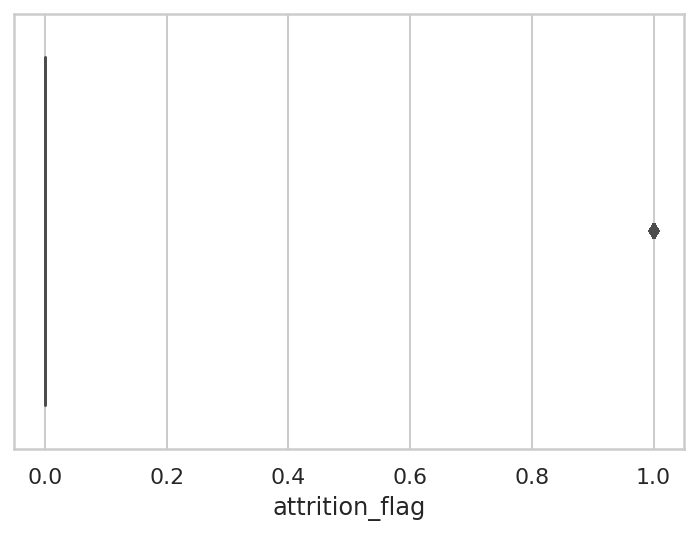

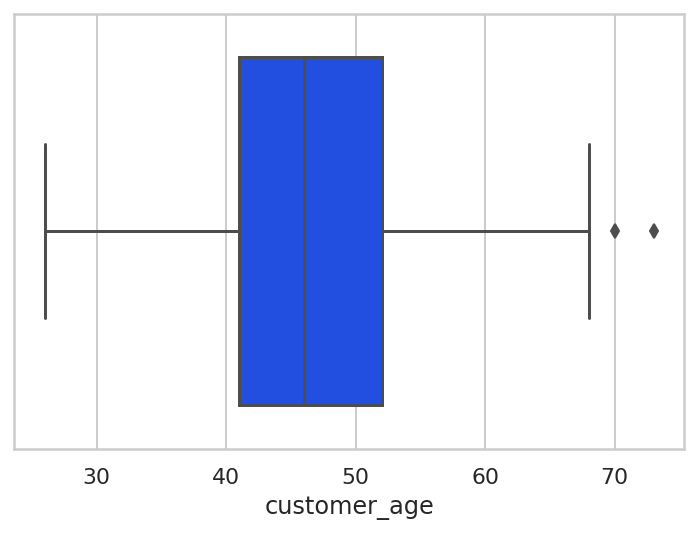

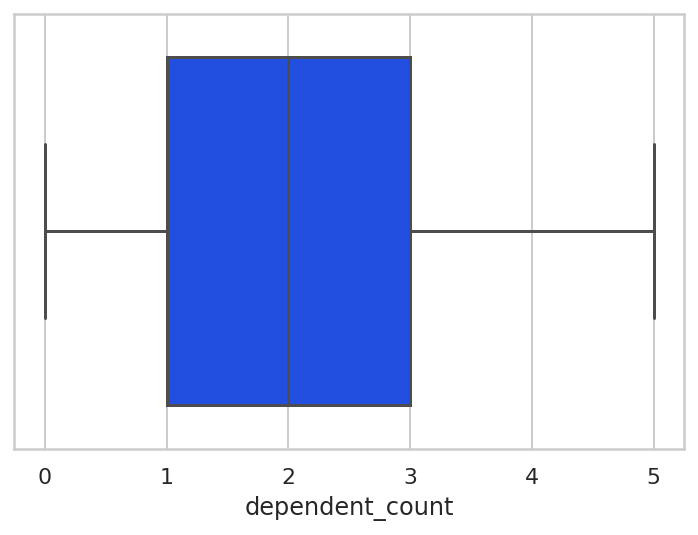

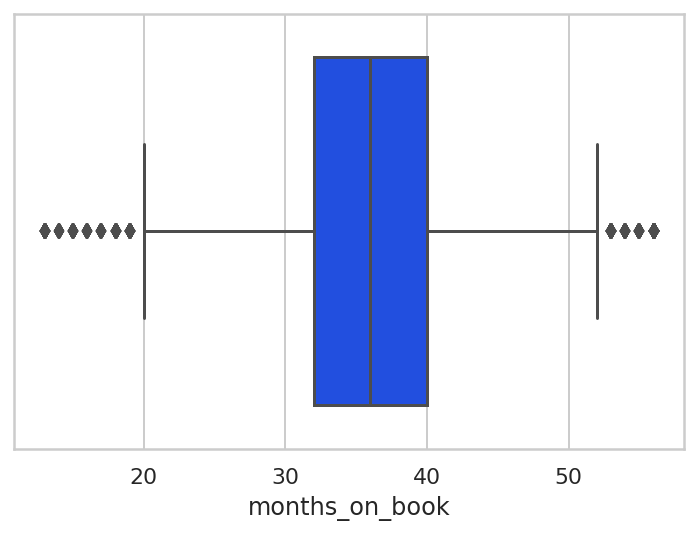

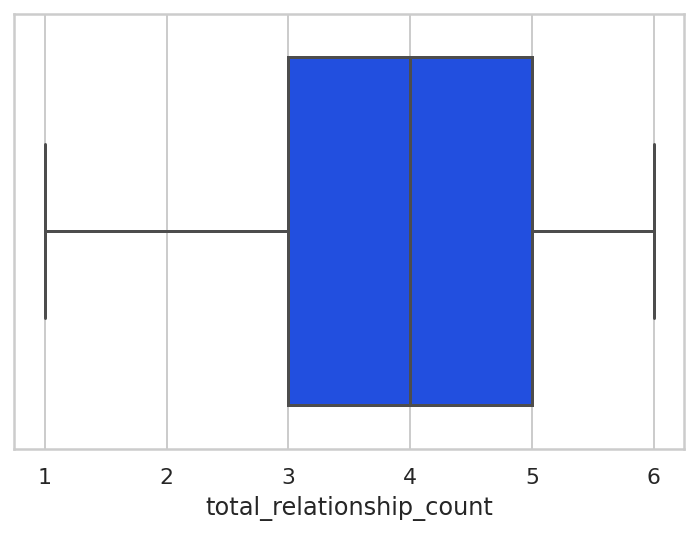

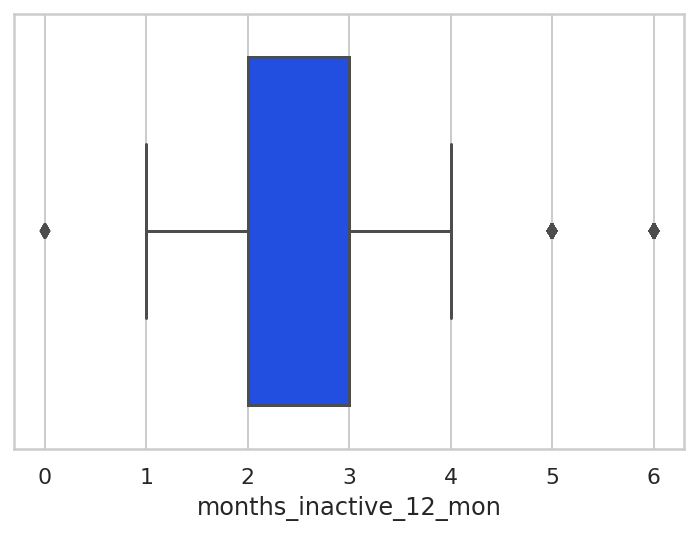

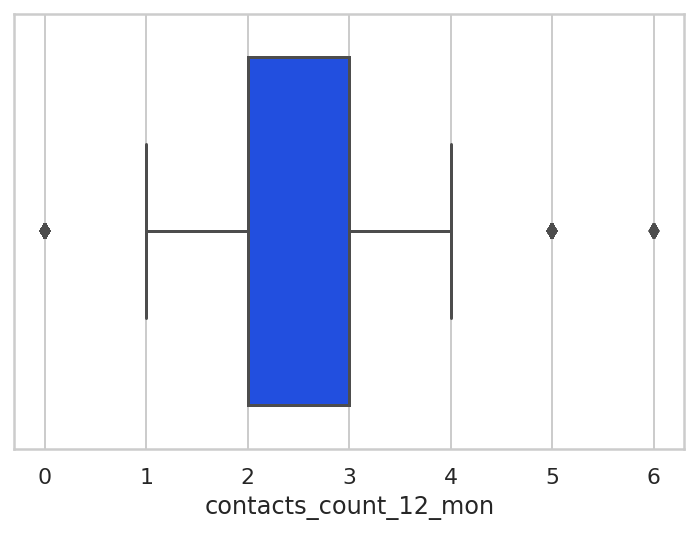

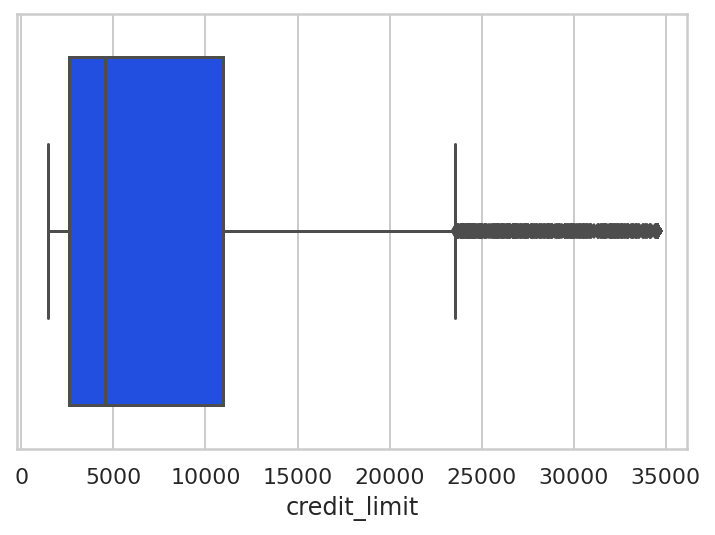

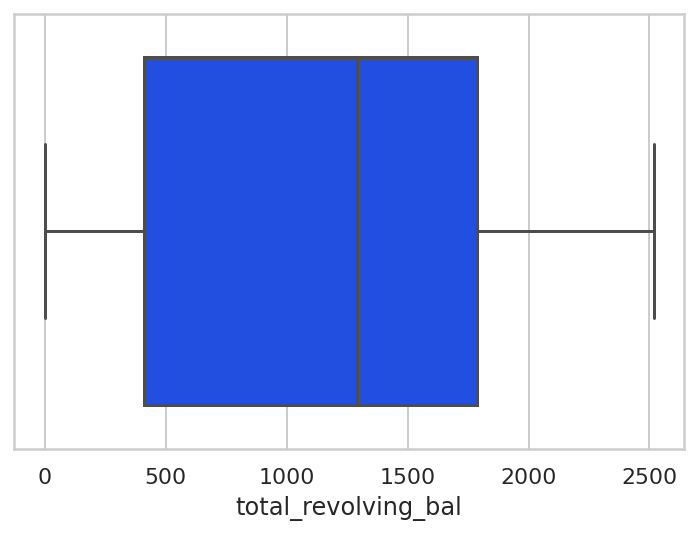

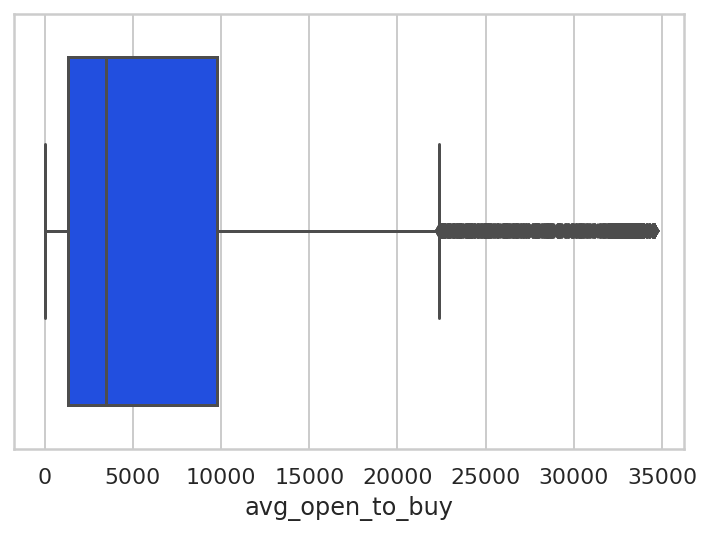

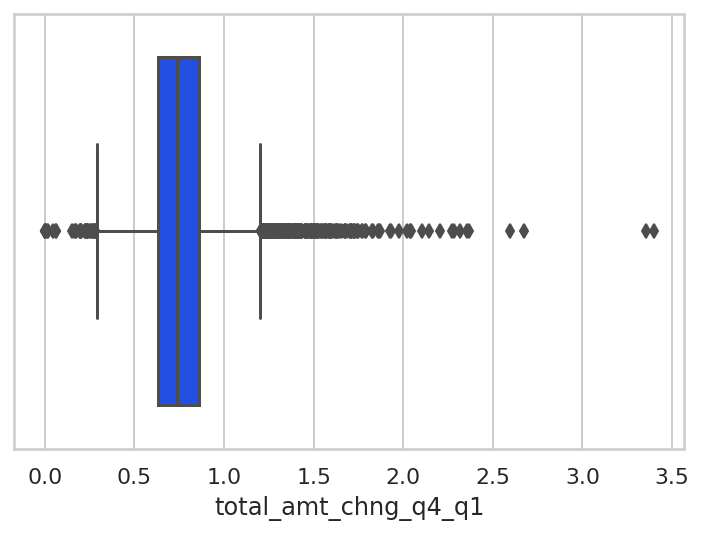

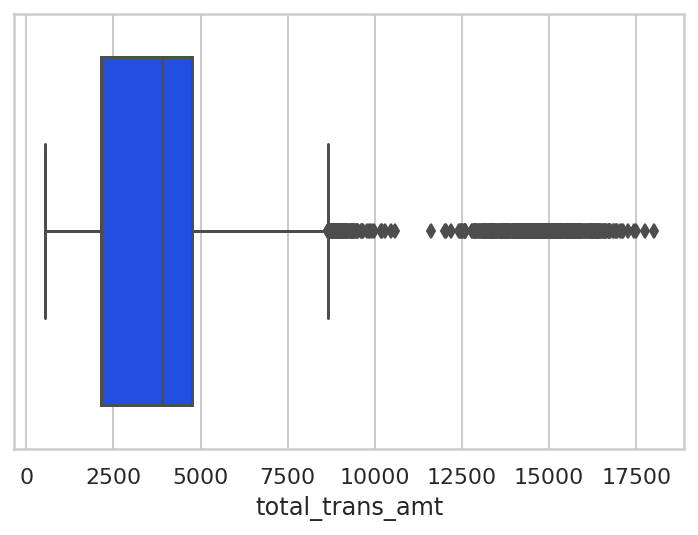

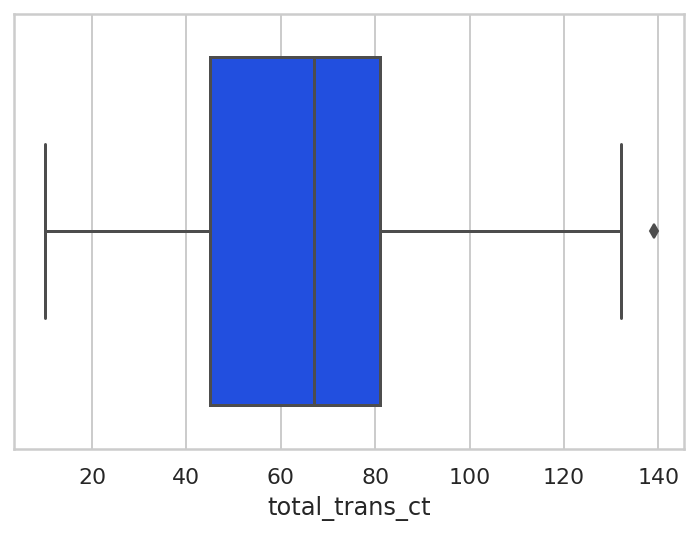

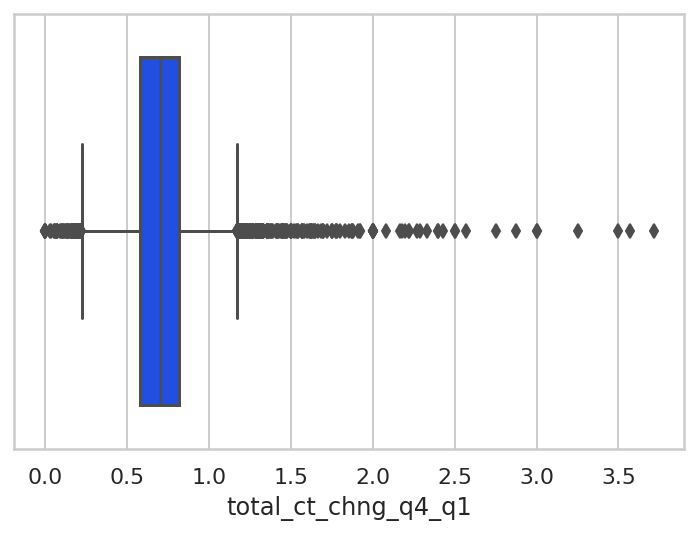

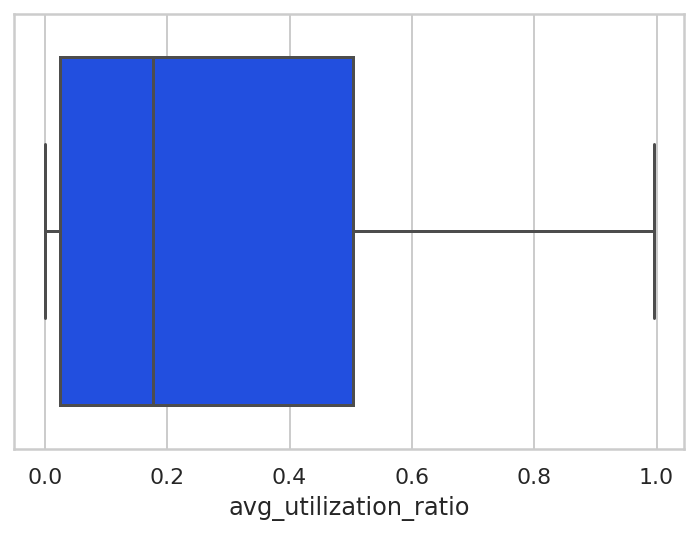

In [ ]:
#check outliers
num = df.select_dtypes(exclude="object").columns


for x in num:
  plt.figure()
  sns.boxplot(data=X_train,x=X_train[x])

Observasi : <br>
1.kolom yang memiliki outliers adalah credit_limit,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1 <br>
2.kolom credit_limit memiliki outliers karena Limit kartu kredit adalah batas maksimal nominal transaksi per bulan yang dapat digunakan oleh nasabah. Tiap-tiap bank memiliki kebijakan yang berbeda mengenai limit pada kartu kredit nasabahnya, tergantung pada kondisi finansial, layanan, dan jenis kartu. sehingga outliers disini adalah hal yang wajar. <br>

## Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?

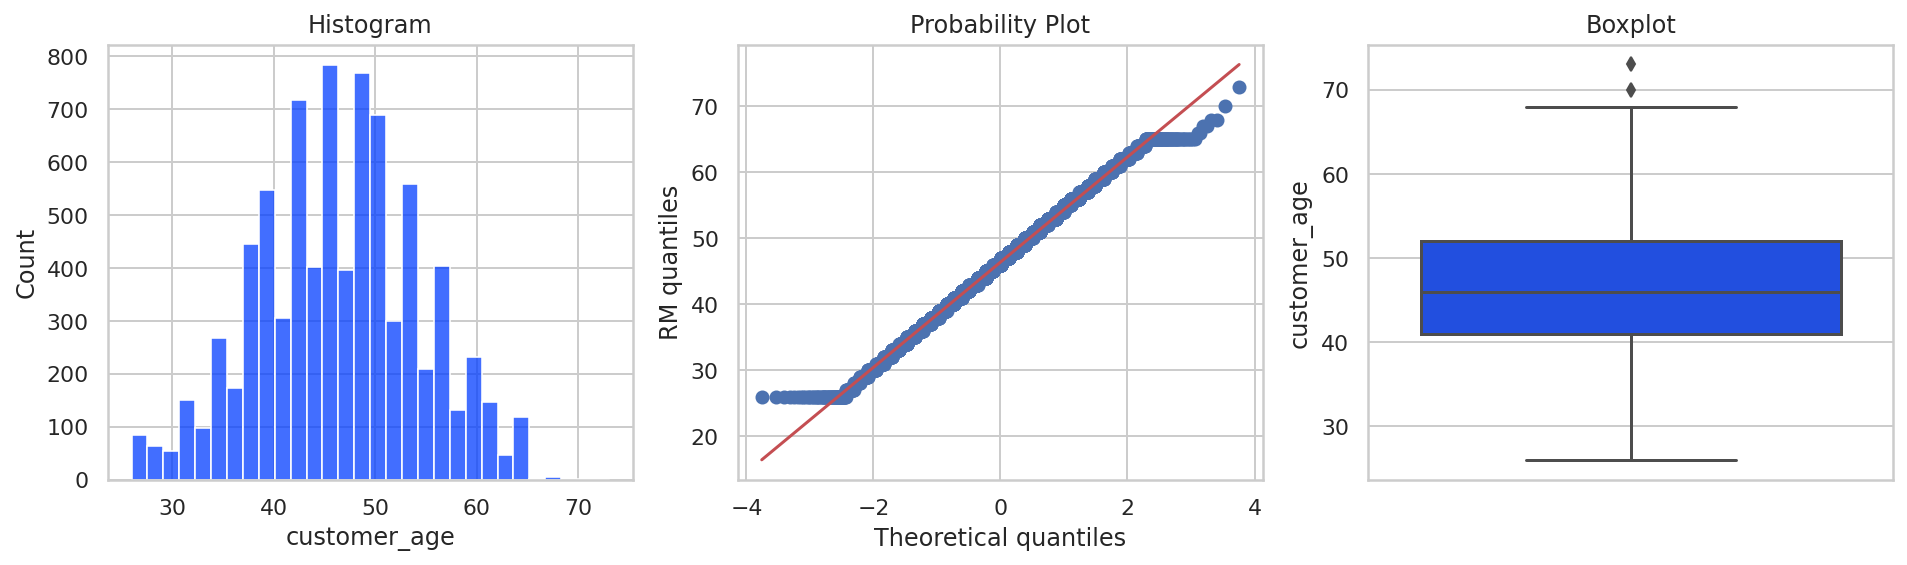

In [ ]:
diagnostic_plots(X_train,"customer_age")

distribusi busi umur dari customer merupakan distribusi yang normal

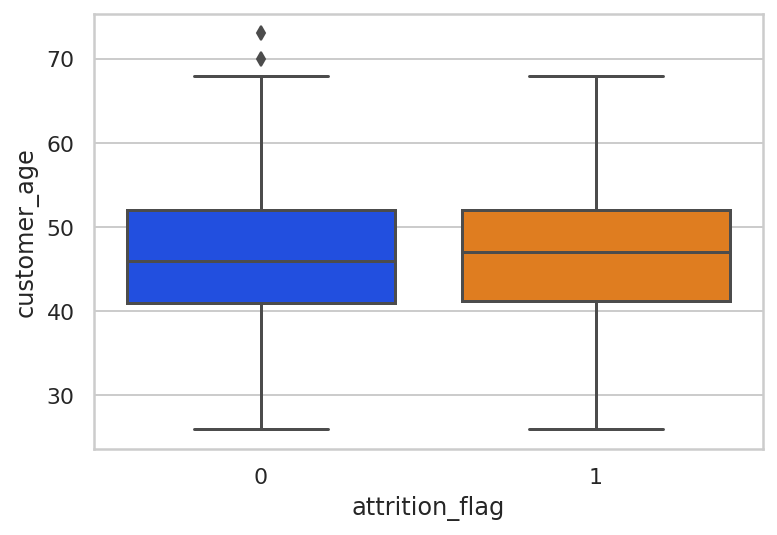

In [ ]:
sns.boxplot(data=X_train,x="attrition_flag",y='customer_age')

secara median terlihat bahwa umur customer yang churn lebih tinggi dibandingkan customer yang tidak churn

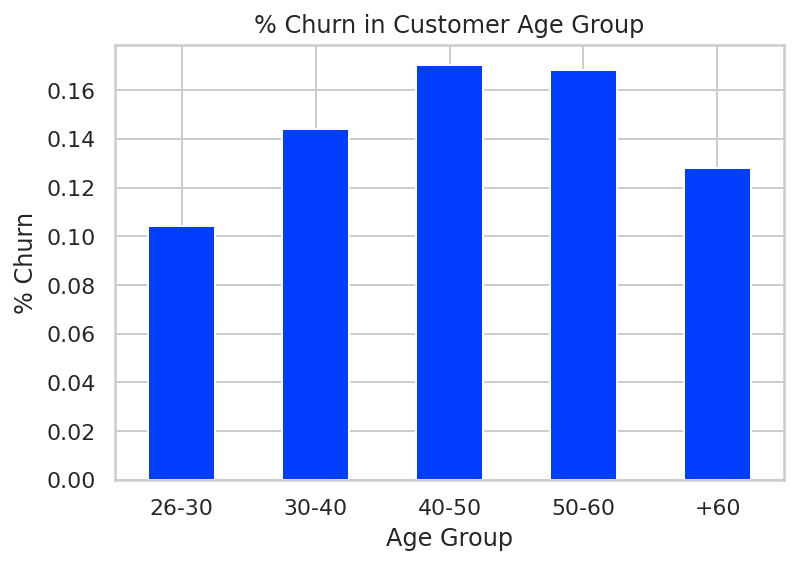

In [ ]:
X_train["customer_age_bin"] = pd.cut(X_train['customer_age'],bins=[26,30,40,50,60,73],labels=['26-30','30-40','40-50','50-60',"+60"])

X_train.groupby("customer_age_bin")["attrition_flag"].mean().plot(kind="bar").set_title("% Churn in Customer Age Group")
plt.ylabel("% Churn")
plt.xlabel("Age Group")
plt.xticks(rotation=0);

bedasarkan kelompok umur, persentase churn yang besar berada pada kelompok 40-50 dan 50-60 tahun

## Apakah terdapat korelasi antara tingkat pendidikan dan income category?

In [ ]:
X_train.columns

Index(['customer_age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'attrition_flag', 'customer_age_bin'],
      dtype='object')

Less than $40K    0.349586
$40K - $60K       0.178990
$80K - $120K      0.149241
$60K - $80K       0.140230
Unknown           0.109369
$120K +           0.072584
Name: income_category, dtype: float64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

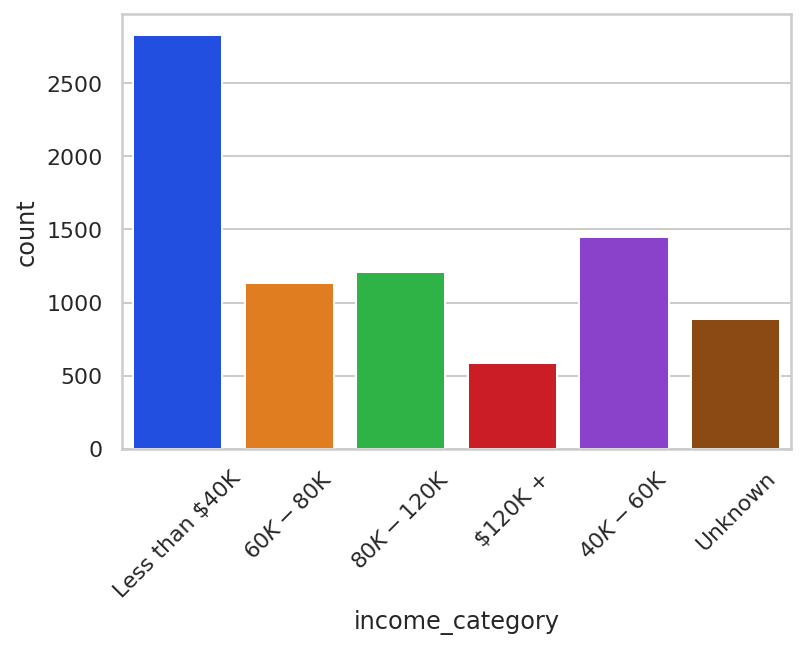

In [ ]:
print(X_train["income_category"].value_counts()/len(X_train))
sns.countplot(data=X_train,x='income_category')
plt.xticks(rotation=45)

cukup banyak nasabah yang memiliki catatan income tidak diketahui (unknown) sebesar 10% dari populasi. untuk mengukur korelasi antara income dengan education level maka unknown akan di take out terlebih dahulu

In [ ]:
X_train["income_category"].unique()

array(['Less than $40K', '$60K - $80K', '$80K - $120K', '$120K +',
       '$40K - $60K', 'Unknown'], dtype=object)

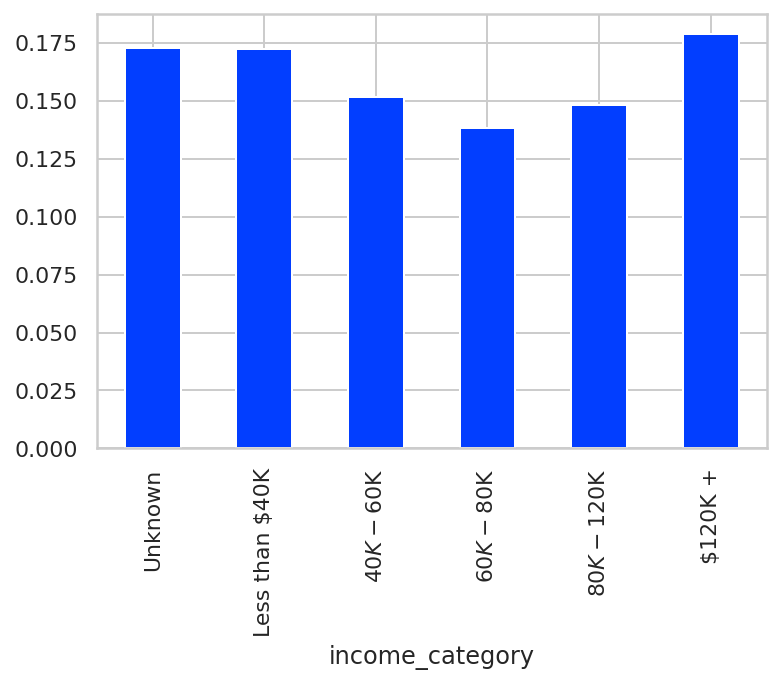

In [ ]:
order_income = ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
X_train.groupby("income_category")["attrition_flag"].mean().loc[order_income].plot(kind='bar')

In [ ]:
income_edu = X_train[X_train['income_category'] != 'Unknown'].copy()
income_edu = income_edu[income_edu['education_level'] != 'Unknown']
income_edu.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,customer_age_bin
user_id,,,,,,,,,,,,,,,,,,,,,
718279008,44,M,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000,1,40-50
771338658,46,M,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078,0,40-50
714529233,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0,30-40
717582558,50,M,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034,0,40-50
708633783,43,M,3,Uneducated,Single,$80K - $120K,Blue,30,3,2,4,11336.0,0,11336.0,0.691,1809,39,0.345,0.000,1,40-50


In [ ]:
income_edu["education_level"] = income_edu["education_level"].replace(['High School', 'Doctorate', 'College', 'Graduate', 'Uneducated','Post-Graduate'],
                                                                      [1,5,2,3,0,4])
income_edu["income_category"] = income_edu["income_category"].replace(['$80K - $120K', '$40K - $60K', 'Less than $40K', '$120K +','$60K - $80K'],
                                                                      [4,2,1,5,3])

In [ ]:
#correlation test education and income
#Ho : tidak ada korelasi income dan level edukasi
#H1 : terdapat korelasi income dan level edukasi

from scipy.stats import kendalltau
(tau,pvalue) = kendalltau(income_edu["education_level"],income_edu["income_category"])

print(f"Tau correlation coefficient {tau}")
print(f'P-value test {pvalue}')

Tau correlation coefficient -0.017663758224775124
P-value test 0.09162350906970575


Dari hasil uji hiphotesis testing kendall tau, tidak terdapat hubungan antara income dan tingkat edukasi

## Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?

In [ ]:
#correlation test education and attrition_flag
#Ho : tidak ada korelasi level edukasi dan attrition_flag
#H1 : terdapat korelasi level edukasi dan attrition_flag
from scipy.stats import spearmanr
(sphr,pvalue) = spearmanr(income_edu["education_level"],income_edu["attrition_flag"])

print(f"spearman correlation coefficient {sphr}")
print(f'P-value test {pvalue}')

spearman correlation coefficient 0.014720108087653727
P-value test 0.24953415237737697


tidak terdapat hubungan antara tingkat edukasi dan churn, karena p-value besar dari 0.05 dan korelasi sangat kecil sebesar 0.014

In [ ]:
#correlation test income_category and attrition_flag
#Ho : tidak ada korelasi income dan attrition_flag
#H1 : terdapat korelasi income dan attrition_flag
(sphr,pvalue) = spearmanr(income_edu["income_category"],income_edu["attrition_flag"])

print(f"spearman correlation coefficient {sphr}")
print(f'P-value test {pvalue}')

spearman correlation coefficient -0.018480534238714916
P-value test 0.1482651842519919


tidak terdapat hubungan antara tingkat incone dan churn, karena p-value besar dari 0.05 dan korelasi sangat kecil sebesar -0.018

## Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?

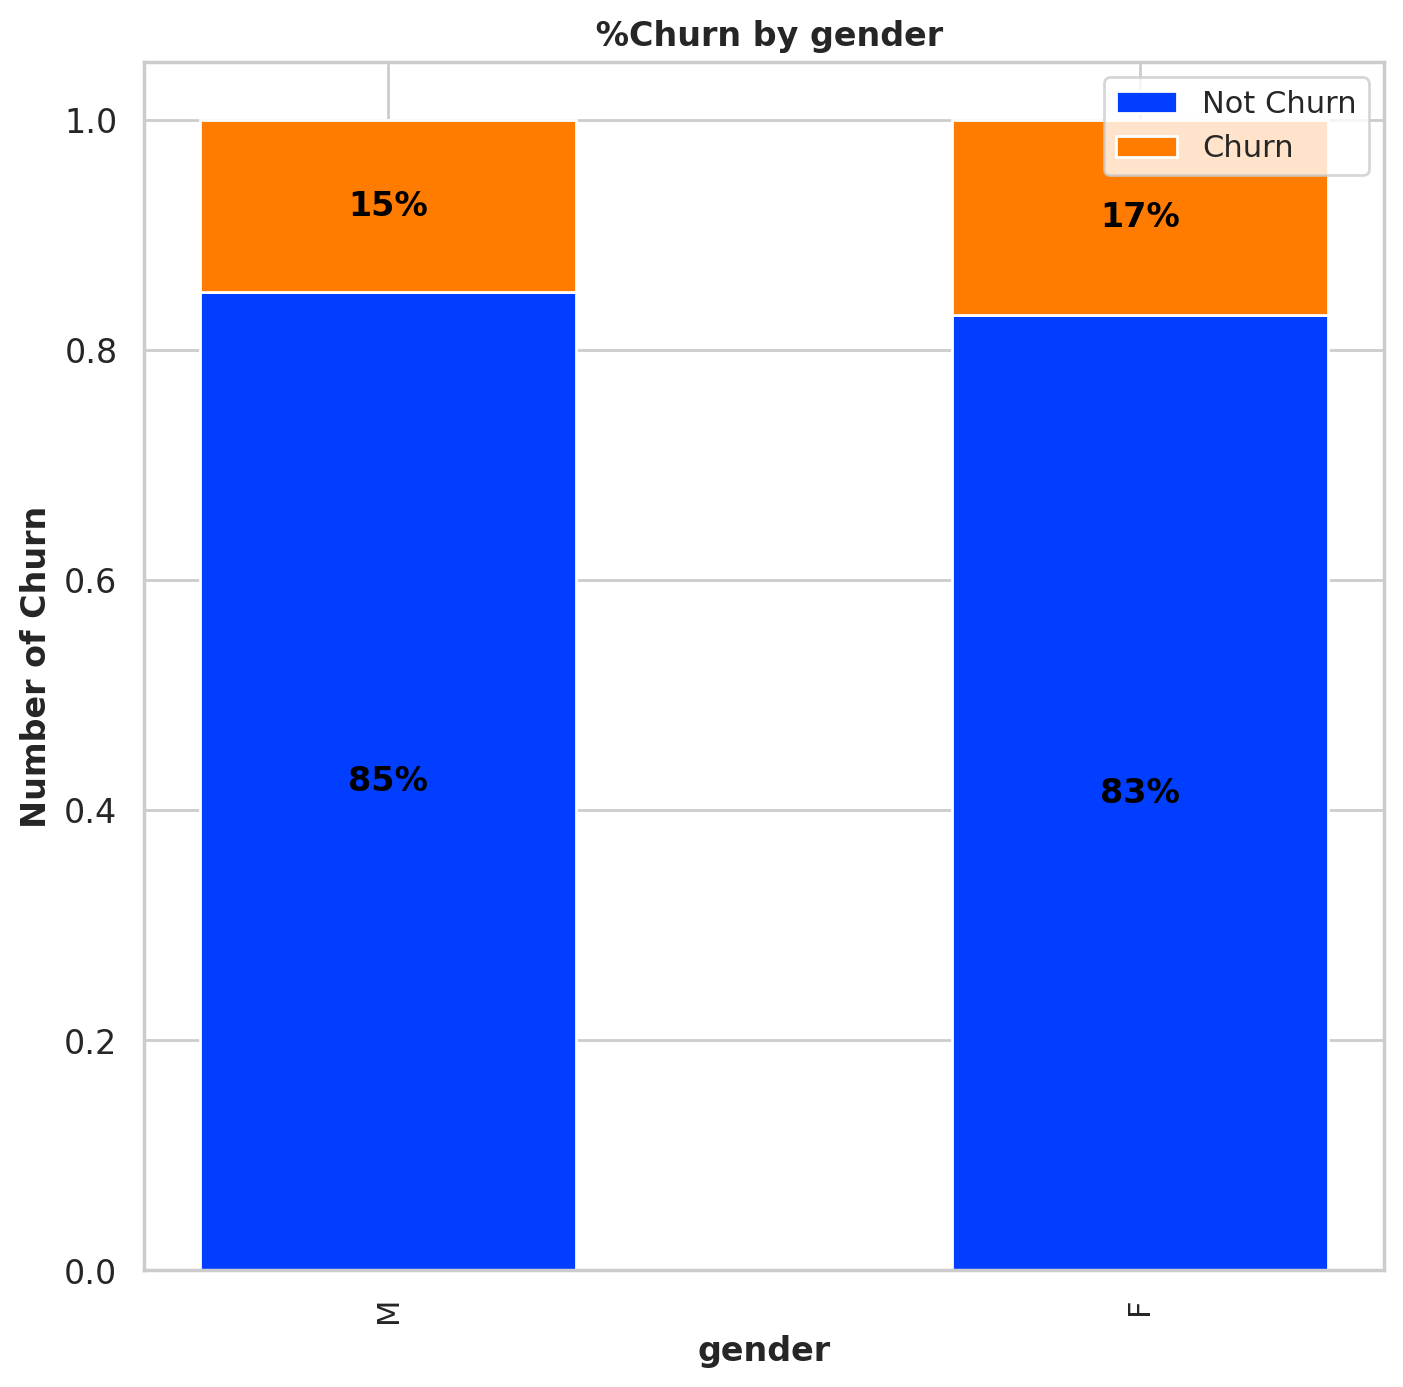

In [ ]:
create_stacked_bar_percent(df,'gender')

dari segi percentase, gender perempuan lebih besar dari laki laki, perempuan memiliki tingkat churn sebesar 17% sedangkan laki laki memiliki tingkat churn sebesar 15%. akan dibuktikan apakah perbedaannya signifikan secara statistik

In [ ]:
from scipy.stats import chi2_contingency
gender_churn = pd.crosstab(X_train.gender,X_train.attrition_flag)

#uji hipothesis
Ho = "tidak terdapat perbedaan signifikant churn pada gender"
H1= "terdapat perbedaan signifikant churn pada gender"

c, p, dof, expected = chi2_contingency(gender_churn)

if p<0.05:
    print(H1,"karena p value kurang dari 0.05, p value is {}".format(p))
else:
    print(Ho,"karena p value lebih dari 0.05, p value is {}".format(p))

terdapat perbedaan signifikant churn pada gender karena p value kurang dari 0.05, p value is 0.00017632820436671044


terdapat perbedaan siginifikan secara statistik antara gender dan churn

## Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?

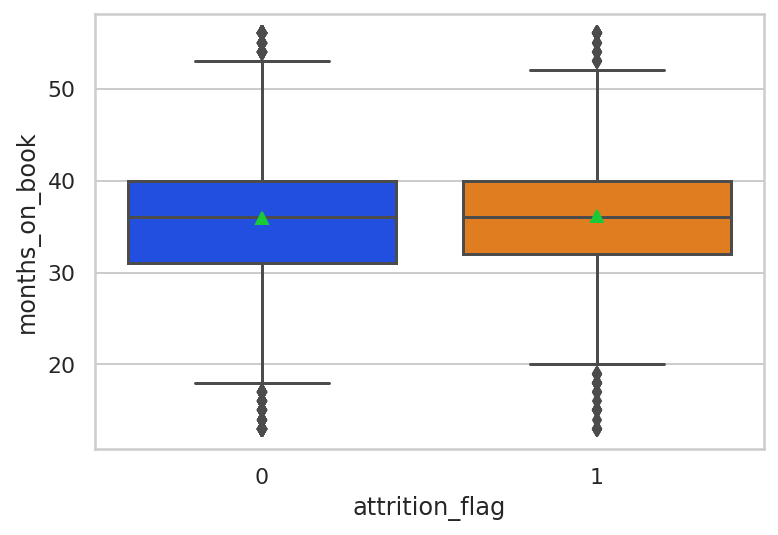

In [ ]:
sns.boxplot(data=X_train,x="attrition_flag",y="months_on_book",showmeans=True)

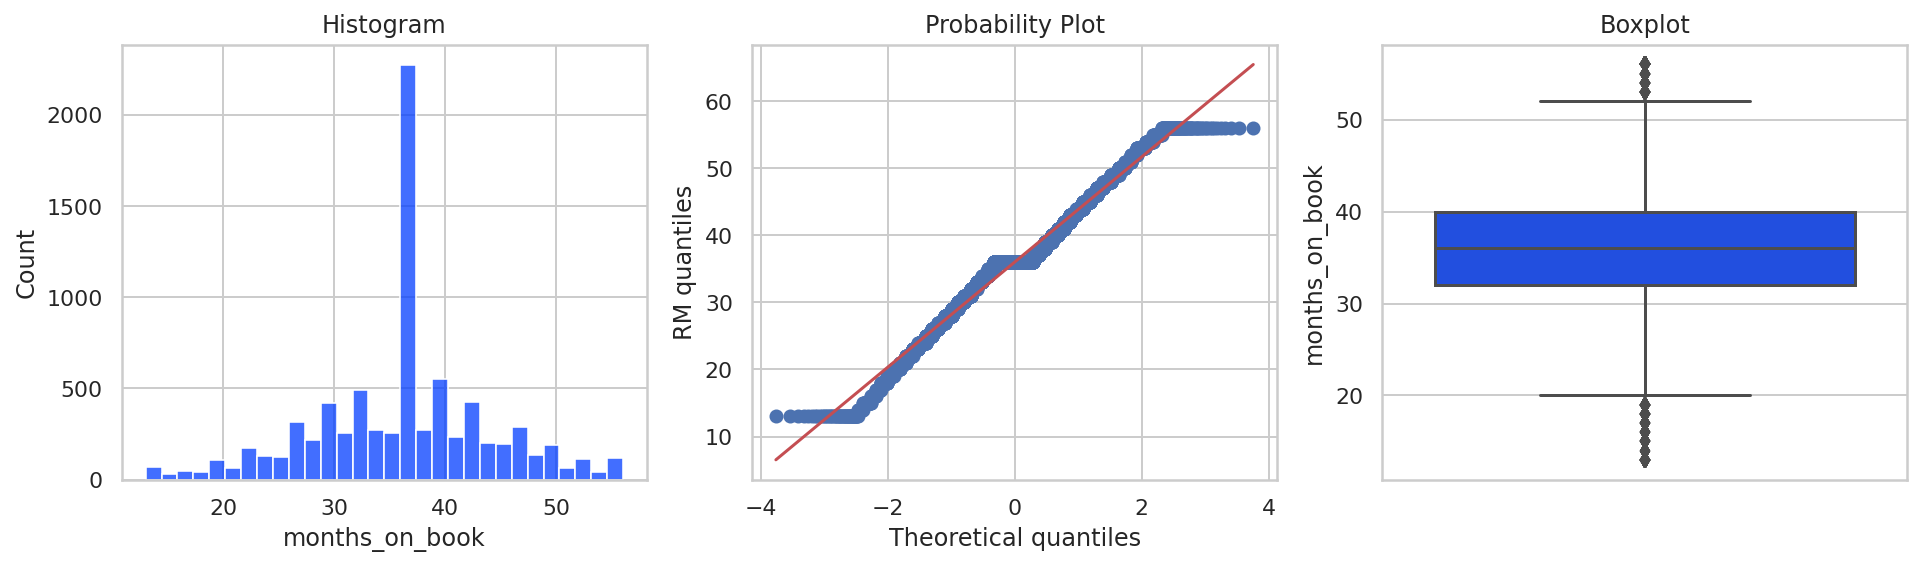

In [ ]:
diagnostic_plots(X_train,'months_on_book')

secara QQ plot data monhts_on_book berdistribusi normal

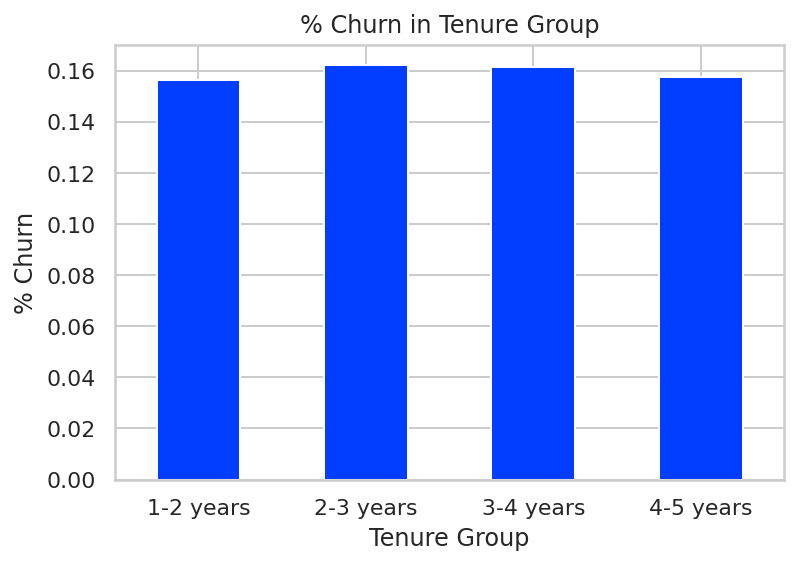

In [ ]:
X_train["year_on_book_cat"] = pd.cut(X_train['months_on_book'],bins=[13,24,36,48,56],labels=['1-2 years','2-3 years','3-4 years',"4-5 years"])
X_train.groupby("year_on_book_cat")["attrition_flag"].mean().plot(kind='bar').set_title("% Churn in Tenure Group")
plt.ylabel("% Churn")
plt.ylim(0)
plt.xlabel("Tenure Group")
plt.xticks(rotation=0);

In [ ]:
(sphr,pvalue) = spearmanr(X_train["months_on_book"],X_train["attrition_flag"])

print(f"spearman correlation coefficient {sphr}")
print(f'P-value test {pvalue}')

spearman correlation coefficient 0.00999520665514895
P-value test 0.36838225921129175


dari korelasi memiliki nilai yang sangat kecil dan hampir bernilai 0

## Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?

In [ ]:
X_train.groupby("contacts_count_12_mon").agg({"attrition_flag":[len,"sum",'mean']})

attrition_flag               
                                 len  sum      mean
contacts_count_12_mon                              
0                                328    5  0.015244
1                               1195   85  0.071130
2                               2563  321  0.125244
3                               2712  546  0.201327
4                               1114  255  0.228905
5                                147   48  0.326531
6                                 42   42  1.000000

In [ ]:
(sphr,pvalue) = spearmanr(X_train["contacts_count_12_mon"],X_train["attrition_flag"])

print(f"spearman correlation coefficient {sphr}")
print(f'P-value test {pvalue}')

spearman correlation coefficient 0.19061225981829608
P-value test 3.788112996145303e-67


# Eksplonatory Part 2

In [ ]:
X_train.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,customer_age_bin,year_on_book_cat
user_id,,,,,,,,,,,,,,,,,,,,,,
787504158,36,F,0,Unknown,Married,Less than $40K,Blue,24,4,3,2,2570.0,2230,340.0,0.686,1755,42,0.448,0.868,0,30-40,1-2 years
718279008,44,M,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000,1,40-50,2-3 years
771338658,46,M,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078,0,40-50,2-3 years
714529233,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0,30-40,1-2 years
717582558,50,M,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034,0,40-50,2-3 years


In [ ]:
X_train["perc_using_credit"] = ((X_train["credit_limit"]-X_train["total_revolving_bal"])/X_train["credit_limit"])*100
X_train["perc_using_credit"] = round(X_train["perc_using_credit"],2)
X_train.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,customer_age_bin,year_on_book_cat,perc_using_credit
user_id,,,,,,,,,,,,,,,,,,,,,,,
787504158,36,F,0,Unknown,Married,Less than $40K,Blue,24,4,3,2,2570.0,2230,340.0,0.686,1755,42,0.448,0.868,0,30-40,1-2 years,13.23
718279008,44,M,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000,1,40-50,2-3 years,100.00
771338658,46,M,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078,0,40-50,2-3 years,92.16
714529233,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0,30-40,1-2 years,49.01
717582558,50,M,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034,0,40-50,2-3 years,96.57


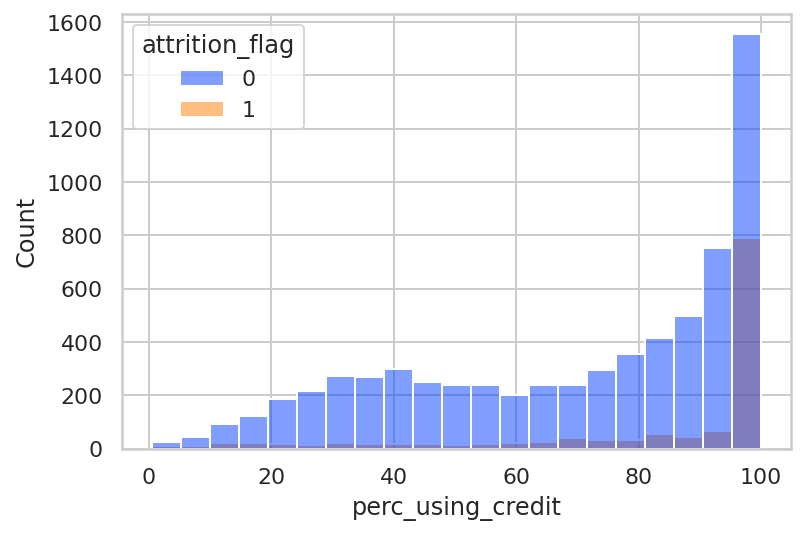

In [ ]:
sns.histplot(data=X_train,x="perc_using_credit",hue="attrition_flag")

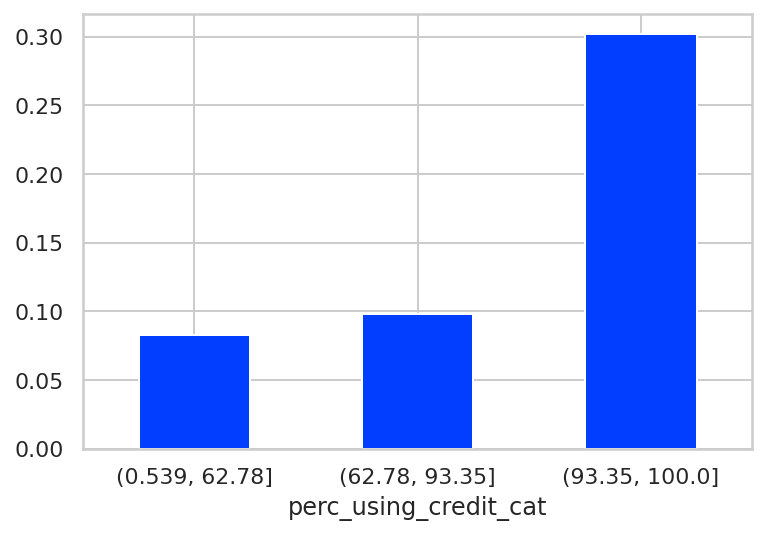

In [ ]:
X_train["perc_using_credit_cat"] = pd.qcut(X_train['perc_using_credit'],q=3)
X_train.groupby("perc_using_credit_cat")["attrition_flag"].mean().plot(kind='bar')
plt.ylim(0)
plt.xticks(rotation=0);

In [ ]:
X_train[X_train["total_ct_chng_q4_q1"]<0.4]

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,customer_age_bin,year_on_book_cat,perc_using_credit,perc_using_credit_cat
user_id,,,,,,,,,,,,,,,,,,,,,,,,
714529233,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0,30-40,1-2 years,49.01,"(0.539, 62.78]"
708633783,43,M,3,Uneducated,Single,$80K - $120K,Blue,30,3,2,4,11336.0,0,11336.0,0.691,1809,39,0.345,0.000,1,40-50,2-3 years,100.00,"(93.35, 100.0]"
716522583,48,F,3,College,Divorced,Less than $40K,Blue,36,4,3,3,2335.0,1845,490.0,0.537,1362,33,0.269,0.790,0,40-50,2-3 years,20.99,"(0.539, 62.78]"
711531858,48,F,4,Unknown,Married,Less than $40K,Blue,41,3,3,3,2447.0,1267,1180.0,0.449,2132,37,0.370,0.518,1,40-50,2-3 years,48.22,"(0.539, 62.78]"
720531633,55,F,1,Graduate,Unknown,Less than $40K,Blue,36,4,2,2,3552.0,2517,1035.0,0.865,2665,36,0.333,0.709,1,50-60,2-3 years,29.14,"(0.539, 62.78]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714424533,41,F,4,Graduate,Married,Less than $40K,Blue,36,6,2,2,1655.0,0,1655.0,0.496,2156,37,0.194,0.000,1,40-50,2-3 years,100.00,"(93.35, 100.0]"
713726958,40,F,3,Doctorate,Married,Less than $40K,Blue,21,5,2,2,1728.0,0,1728.0,0.410,2191,38,0.357,0.000,1,30-40,1-2 years,100.00,"(93.35, 100.0]"
712751133,42,M,3,Doctorate,Single,$60K - $80K,Blue,35,3,3,3,11328.0,1369,9959.0,0.585,1829,42,0.312,0.121,1,40-50,2-3 years,87.91,"(62.78, 93.35]"
